In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Boosting

#### Adaboost

In [2]:
# データ準備
df = sns.load_dataset('titanic')
df.dropna(inplace=True)

# X, yを作成
# X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')] 
# 後ほどXに対して更新をおこうなう際に，Viewに対して代入処理をするとSettingWithCopyWarningが発生するため，.dropを使用する
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']

# ラベルエンコーディング
oe = OrdinalEncoder()
# 出力結果をDataFrameにする．NumPyArrayだと後続の処理でエラーになることが多い
oe.set_output(transform='pandas') # sklearnが古い場合は!pip install --upgrade scikit-learnで更新
# デフォルトではうまくカテゴリカル変数のみをターゲットにしてくれないので，カテゴリカル変数に対してのみ処理をするようにする
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
X[cat_cols] = oe.fit_transform(X[cat_cols])

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=0).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f"adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}")

adaboost AUC: 0.9375


[0.   0.   0.02 0.   0.   0.07 0.   0.   0.29 0.62 0.   0.   0.  ]


<BarContainer object of 13 artists>

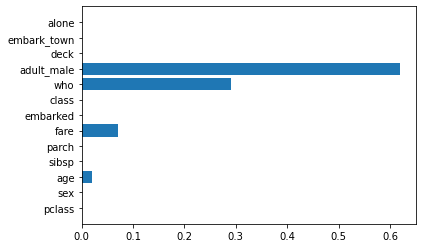

In [7]:
# 特徴量重要度
print(ada.feature_importances_)
plt.barh(X.columns, ada.feature_importances_)